<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


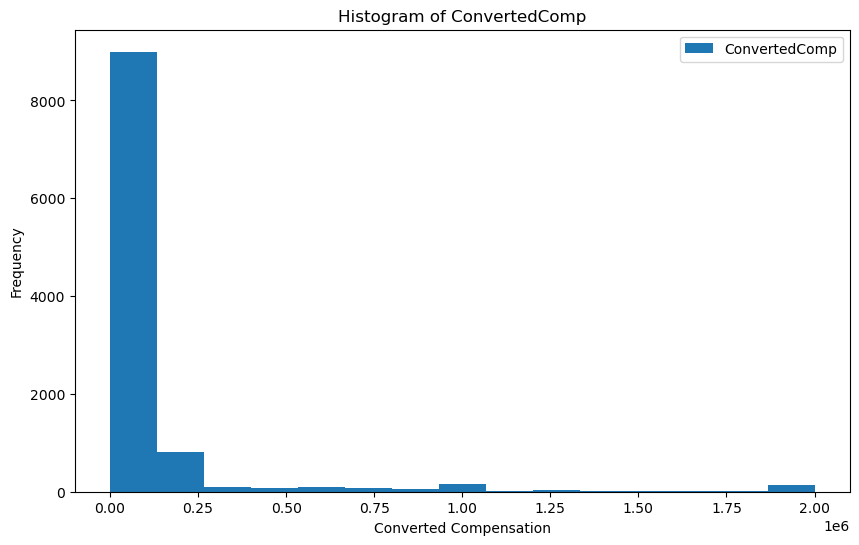

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
SELECT ConvertedComp
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

df.plot(kind='hist',
        figsize=(10,6),
        bins=15
        )
plt.title("Histogram of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.show()

### Box Plots


Plot a box plot of `Age.`


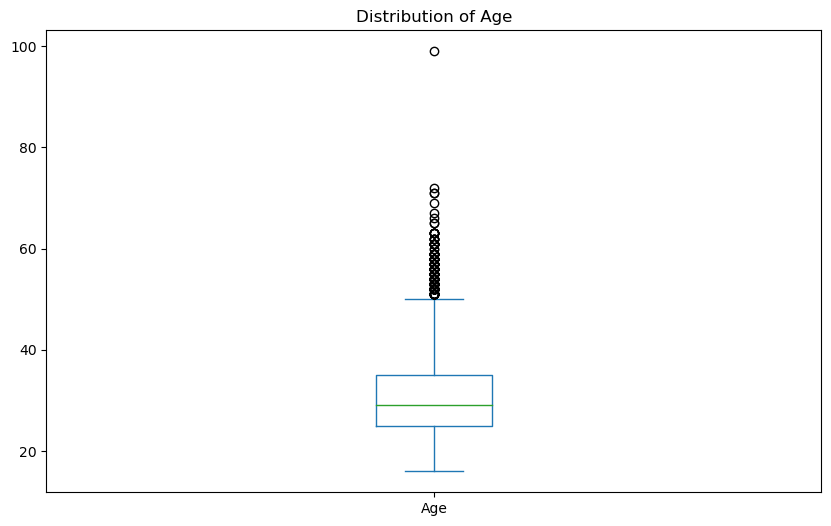

In [4]:
# your code goes here
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY, conn)

df.plot(kind='box', figsize=(10,6))
plt.title('Distribution of Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


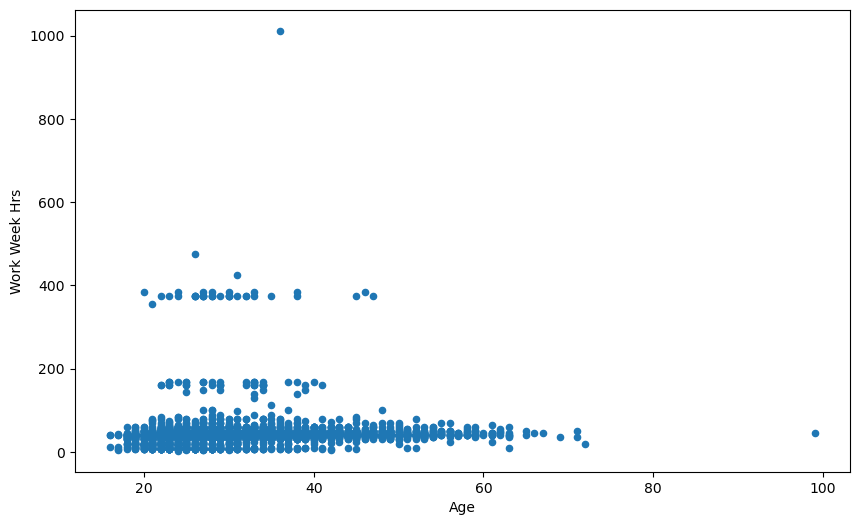

0.03651747018287782

In [5]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10,6))
plt.ylabel("Work Week Hrs")
plt.xlabel("Age")
plt.show()

df['Age'].corr(df['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


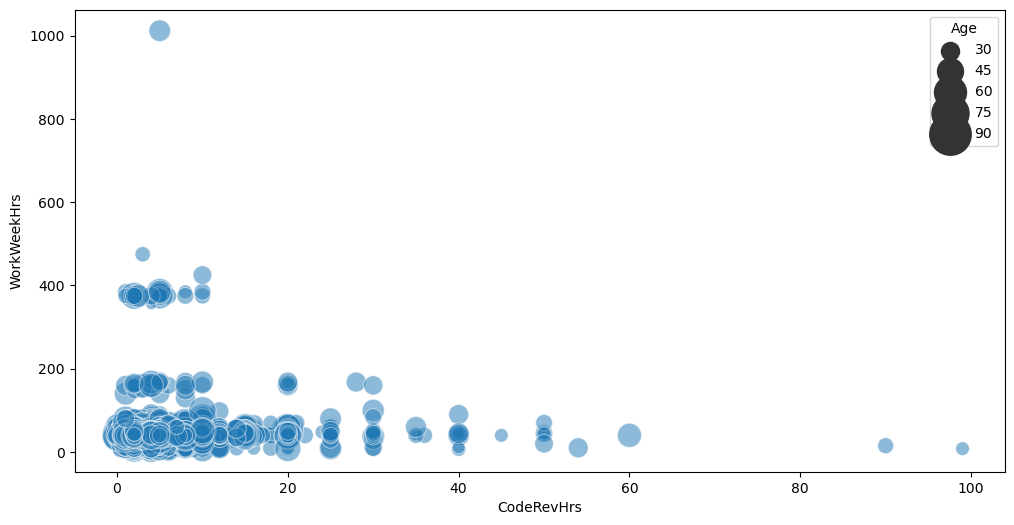

In [6]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""
df = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='CodeRevHrs', y='WorkWeekHrs', size='Age', alpha=0.5, sizes=(1,1000))
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


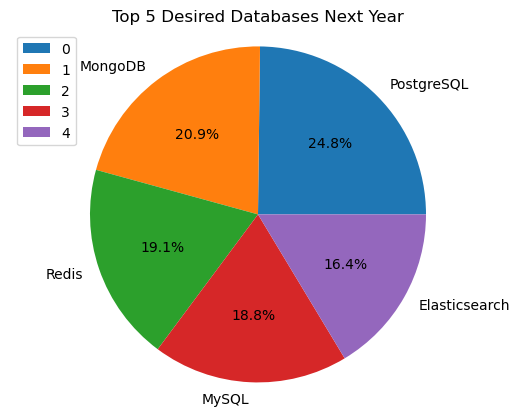

In [7]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS COUNT
FROM DatabaseDesireNextYear
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY, conn)

labels = df['DatabaseDesireNextYear']
plt.pie(df['COUNT'],
        autopct='%1.1f%%',
        labels=labels
        )
plt.title("Top 5 Desired Databases Next Year")
plt.axis('equal')
plt.legend(labels=df.index, loc='upper left')
plt.show()



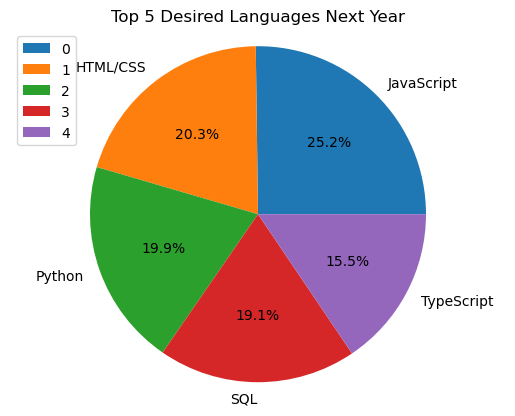

  LanguageDesireNextYear  COUNT
0             JavaScript   6630
1               HTML/CSS   5328
2                 Python   5239
3                    SQL   5012
4             TypeScript   4088


In [8]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) AS COUNT
FROM LanguageDesireNextYear
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY, conn)
labels = df['LanguageDesireNextYear']
plt.pie(df['COUNT'],
        autopct='%1.1f%%',
        labels=labels
        )
plt.title("Top 5 Desired Languages Next Year")
plt.axis('equal')
plt.legend(labels=df.index, loc='upper left')
plt.show()
print(df)



      LanguageWorkedWith  COUNT
0             JavaScript   8687
1               HTML/CSS   7830
2                    SQL   7106
3  Bash/Shell/PowerShell   4642
4                 Python   4542


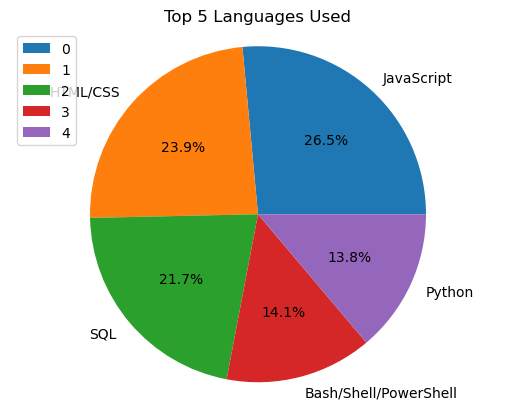

In [15]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*) COUNT
FROM LanguageWorkedWith
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY, conn)
print(df)
labels = df['LanguageWorkedWith']
plt.pie(df['COUNT'],
        autopct='%1.1f%%',
        labels=labels
        )
plt.title("Top 5 Languages Used")
plt.axis('equal')
plt.legend(labels=df.index, loc='upper left')
plt.show()


In [31]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith

"""
df = pd.read_sql_query(QUERY, conn)

data = df.groupby('Respondent').filter(lambda x: len(x) == 1 and x['DatabaseWorkedWith'].iloc[0] == 'MySQL')

respondent_counts = len(data['Respondent'].unique())

print(f"{respondent_counts} respondents indicated that they work on MySQL only")



474 respondents indicated that they work on MySQL only


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


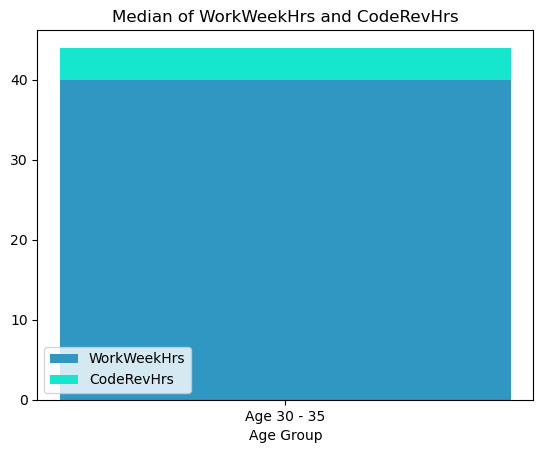

In [10]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE age >= 30 AND age <= 35

"""
df = pd.read_sql_query(QUERY, conn)
x = 'Age 30 - 35'
y1 = df['WorkWeekHrs'].median()
y2 = df['CodeRevHrs'].median()
plt.bar(x, y1, color='#2F97C1', label = 'WorkWeekHrs')
plt.bar(x, y2, bottom = y1, color='#15E6CD', label = 'CodeRevHrs')
plt.legend()
plt.xlabel("Age Group")
plt.title("Median of WorkWeekHrs and CodeRevHrs")
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


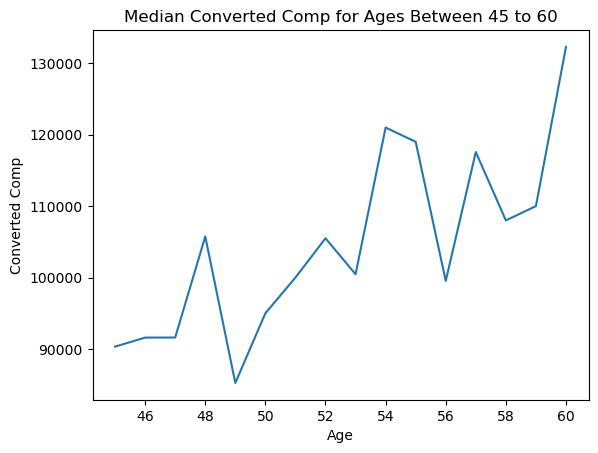

In [11]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE age >= 45 AND age <= 60

"""
df = pd.read_sql_query(QUERY, conn)
median_cc = df.groupby('Age')['ConvertedComp'].median()
median_cc.index = median_cc.index.map(int)
median_cc.plot(kind='line')
plt.title('Median Converted Comp for Ages Between 45 to 60')
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.show()


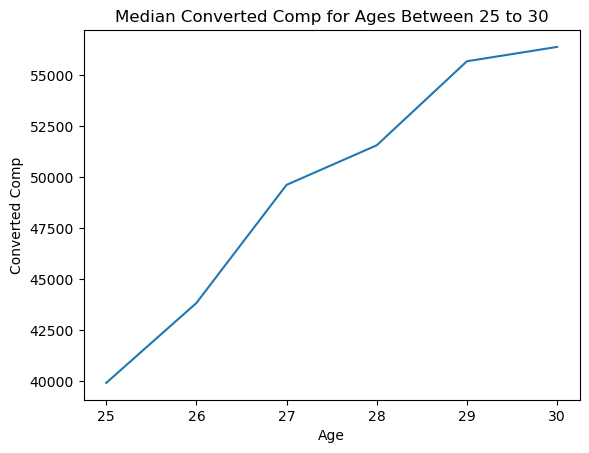

In [20]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE age >= 25 AND age <= 30

"""
df = pd.read_sql_query(QUERY, conn)
median_cc = df.groupby('Age')['ConvertedComp'].median()
median_cc.index = median_cc.index.map(int)
median_cc.plot(kind='line')
plt.title('Median Converted Comp for Ages Between 25 to 30')
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


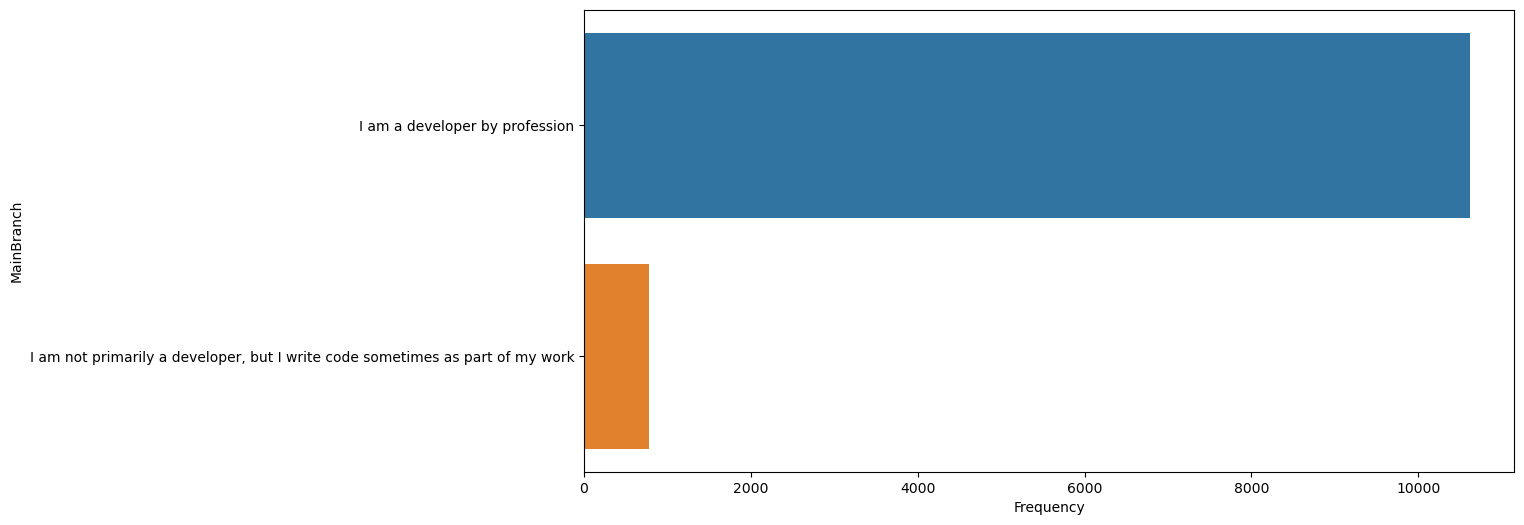

In [12]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY 1

"""
df = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='MainBranch',data=df, orient = 'h')
plt.show()


In [23]:
QUERY = """
SELECT DevType, COUNT(*) COUNT
FROM DevType
GROUP BY 1
ORDER BY 2 DESC

"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,DevType,COUNT
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


Close the database connection.


In [45]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
